<a href="https://colab.research.google.com/github/IMPRIME17/Deep-learning-Projects/blob/master/Deep-learning-Projects/traffic_Sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs
  

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [0]:
!ls sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle as pkl
import random

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [0]:
!ls german-traffic-signs/

signnames.csv  test.p  train.p	valid.p


In [0]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data =pkl.load(f)

with open('german-traffic-signs/test.p', 'rb') as f:
  test_data =pkl.load(f)
  
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data =pkl.load(f)
  
X_train, y_train = train_data['features'],train_data['labels']
X_test, y_test = test_data['features'],test_data['labels']
X_val, y_val = val_data['features'],val_data['labels']

In [0]:
train_data.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [0]:
import pandas as pd
data = pd.read_csv('german-traffic-signs/signnames.csv')

In [0]:
data.tail()

,ClassId,SignName
38,38,Keep right
39,39,Keep left
40,40,Roundabout mandatory
41,41,End of no passing
42,42,End of no passing by vechiles over 3.5 metric ...


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
ClassId     43 non-null int64
SignName    43 non-null object
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes


In [0]:
len(y_train)

34799

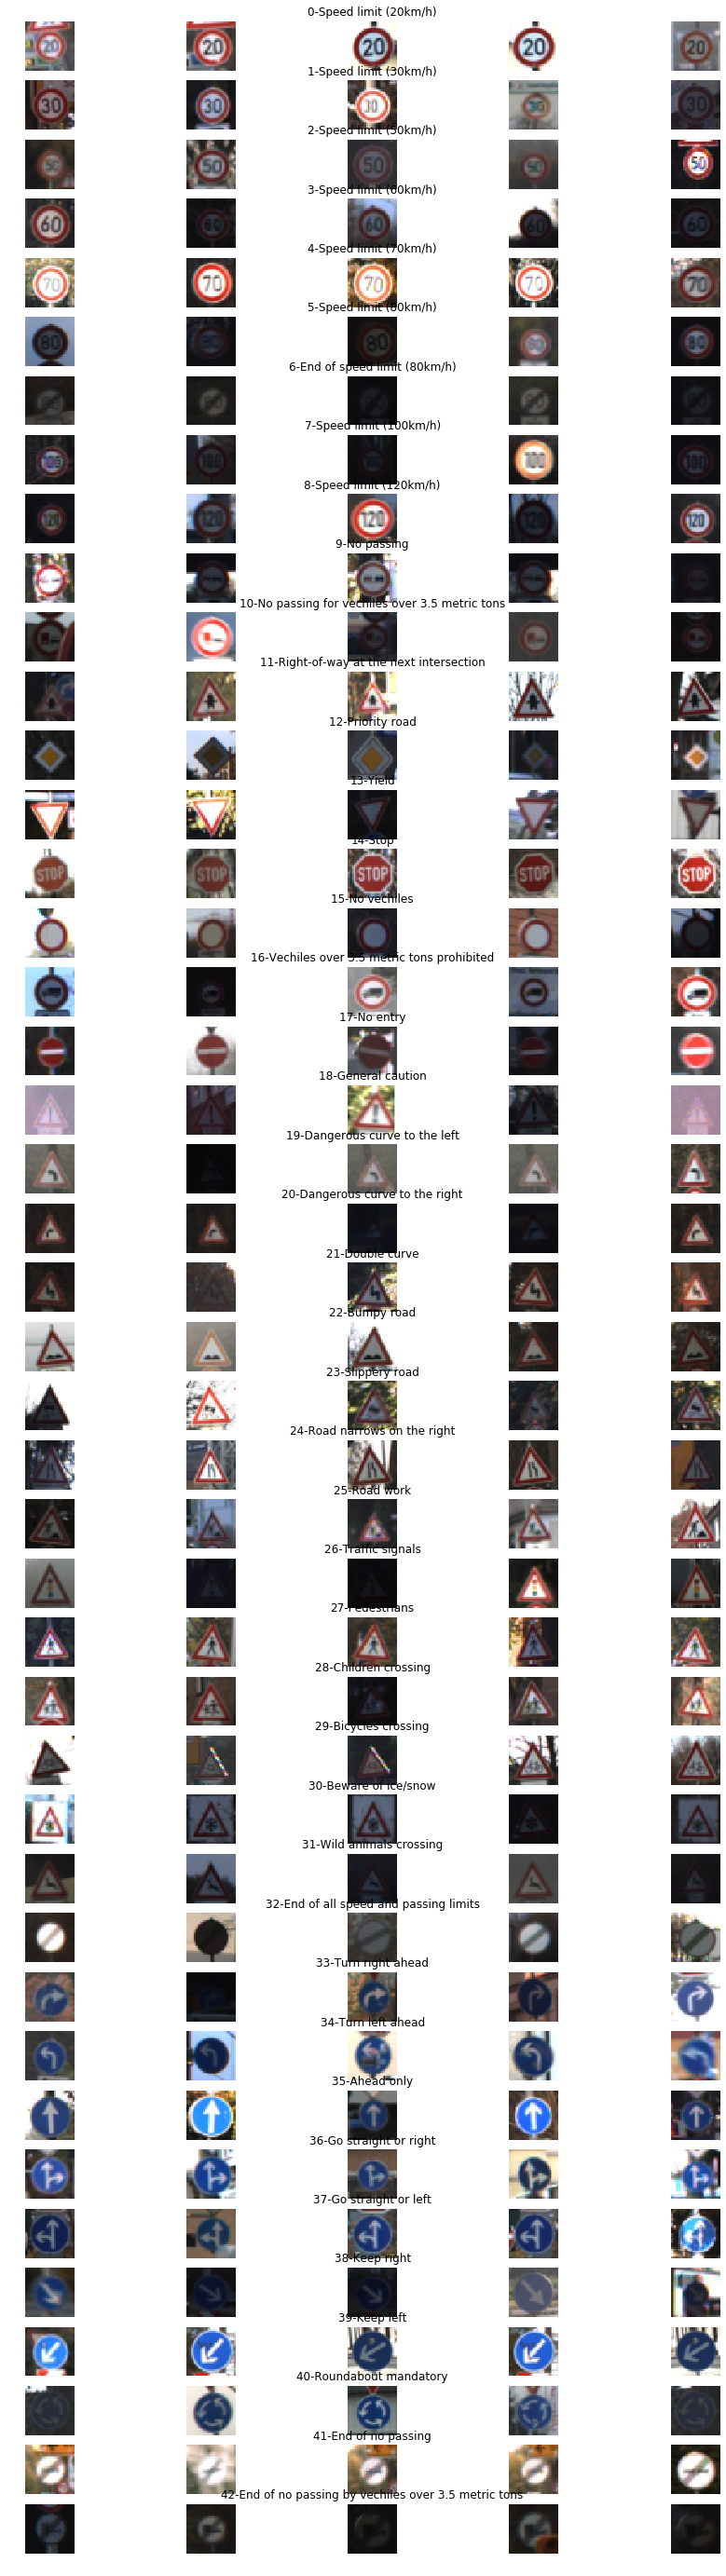

In [0]:
num_of_samples =[]
cols = 5
num_classes = 43
fig, axs = plt.subplots(nrows= num_classes, ncols=cols, figsize= (15,50))

for i in range(cols):
  for j,raw in data.iterrows():
    X_selected = X_train[y_train== j]
    axs[j][i].imshow(X_selected[random.randint(0,(len(X_selected)-1)), :, :], cmap=plt.get_cmap('gray'))
    axs[j][i].axis('off')
    if i == 2:
      axs[j][i].set_title(str(j)+ '-'+raw["SignName"])
      num_of_samples.append(len(X_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


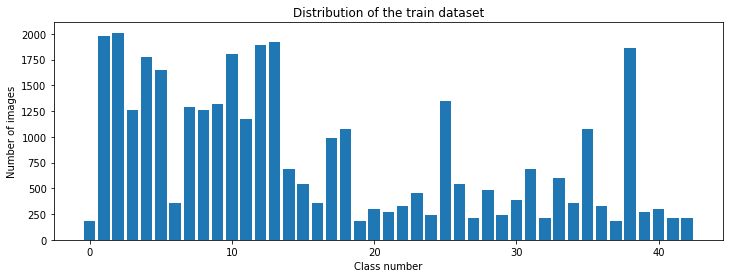

In [0]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


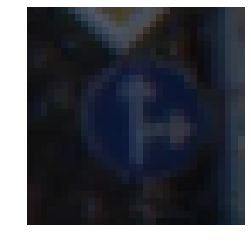

In [0]:
import cv2
plt.imshow(X_train[1000])
plt.axis('off')
print(X_train[1000].shape)
print(y_train[1000])

In [0]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  return img

(32, 32)


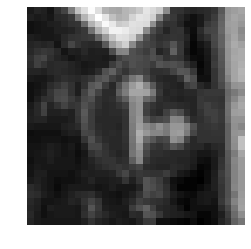

In [0]:
img = grayscale(X_train[1000])
plt.imshow(img, cmap="gray")
plt.axis('off')
print(img.shape)

In [0]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

(32, 32)


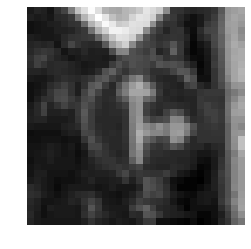

In [0]:
img - equalize(img)
plt.imshow(img, cmap="gray")
plt.axis('off')
print(img.shape)

In [0]:
def preprocess(img):
  img=  grayscale(img)
  img=  equalize(img)
  img = img/255
  return img

In [0]:
X_train = np.array(list(map(preprocess,X_train)))
X_test = np.array(list(map(preprocess,X_test)))
X_val = np.array(list(map(preprocess,X_val)))

In [0]:
len(num_of_samples)

43

(34799, 32, 32)


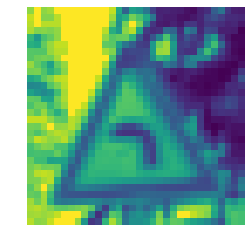

In [0]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis('off')
print(X_train.shape)

In [0]:
X_train = X_train.reshape(34799,32,32,1)
X_test = X_test.reshape(12630,32,32,1)
X_val = X_val.reshape(4410,32,32,1)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range= 0.2,
                            shear_range=0.1,
                            rotation_range=10)
datagen.fit(X_train)
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)
y_val = to_categorical(y_val,43)

In [0]:
data.iterrows

<bound method DataFrame.iterrows of     ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14        

In [0]:
X_train.shape

(34799, 32, 32, 1)

In [0]:
def le_net():
  model = Sequential()
  model.add(Conv2D(30,(5,5), input_shape=(32,32,1), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation="softmax"))
  model.compile(Adam(lr=0.001),loss ='categorical_crossentropy', metrics=['accuracy'])
  return model

In [0]:
lenet = le_net()


W0730 13:46:18.701355 140381986350976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0730 13:46:18.732459 140381986350976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 13:46:18.736203 140381986350976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0730 13:46:18.751187 140381986350976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0730 13:46:18.785402 140381986350976 deprecation_wrapp

In [0]:
lenet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               270500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
__________

In [0]:
history= lenet.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=20, validation_split= 0.1, batch_size=400,verbose=1,shuffle=1)

W0730 13:46:18.977687 140381986350976 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 34799 samples, validate on 4410 samples
Epoch 1/20
34799/34799 [==============================] - 4s 105us/step - loss: 2.8505 - acc: 0.2565 - val_loss: 1.5565 - val_acc: 0.5993
Epoch 2/20
34799/34799 [==============================] - 1s 24us/step - loss: 1.2143 - acc: 0.6341 - val_loss: 0.7138 - val_acc: 0.7993
Epoch 3/20
34799/34799 [==============================] - 1s 24us/step - loss: 0.7171 - acc: 0.7785 - val_loss: 0.5045 - val_acc: 0.8488
Epoch 4/20
34799/34799 [==============================] - 1s 24us/step - loss: 0.5140 - acc: 0.8407 - val_loss: 0.3921 - val_acc: 0.8839
Epoch 5/20
34799/34799 [==============================] - 1s 24us/step - loss: 0.4088 - acc: 0.8743 - val_loss: 0.3328 - val_acc: 0.8971
Epoch 6/20
34799/34799 [==============================] - 1s 25us/step - loss: 0.3417 - acc: 0.8966 - val_loss: 0.3039 - val_acc: 0.9095
Epoch 7/20
34799/34799 [==============================] - 1s 25us/step - loss: 0.2840 - acc: 0.9124 - val_loss: 0.2648 - val_acc

In [0]:
lenet.save('digit.h5')

In [0]:
!ls

digit2.h5  digit.h5  german-traffic-signs  sample_data


In [0]:
from google.colab import files

In [0]:
files.download('digit.h5')

Text(0.5, 0, 'epoch')

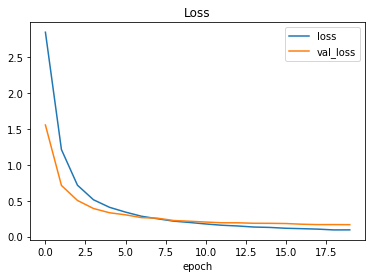

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

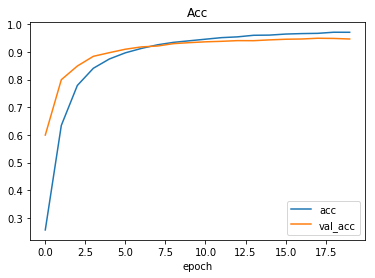

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('Acc')
plt.xlabel('epoch')


In [0]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60,(5,5), input_shape=(32,32,1), activation = 'relu'))
  model.add(Conv2D(60,(5,5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  
  model.add(Conv2D(30,(3,3), activation='relu'))
  model.add(Conv2D(30,(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(500,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation="softmax"))
  model.compile(Adam(lr=0.001),loss ='categorical_crossentropy', metrics=['accuracy'])
  return model

In [0]:
lenet2 = modified_model()

In [0]:
lenet2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 30)          0         
__________

In [0]:
history= lenet2.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=20, validation_split= 0.1, batch_size=400,verbose=1,shuffle=1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/20
34799/34799 [==============================] - 4s 120us/step - loss: 2.8704 - acc: 0.2365 - val_loss: 1.2935 - val_acc: 0.6703
Epoch 2/20
34799/34799 [==============================] - 3s 74us/step - loss: 1.1237 - acc: 0.6638 - val_loss: 0.4344 - val_acc: 0.8780
Epoch 3/20
34799/34799 [==============================] - 3s 74us/step - loss: 0.6415 - acc: 0.8022 - val_loss: 0.2816 - val_acc: 0.9195
Epoch 4/20
34799/34799 [==============================] - 3s 74us/step - loss: 0.4571 - acc: 0.8587 - val_loss: 0.2041 - val_acc: 0.9429
Epoch 5/20
34799/34799 [==============================] - 3s 74us/step - loss: 0.3678 - acc: 0.8861 - val_loss: 0.1648 - val_acc: 0.9501
Epoch 6/20
34799/34799 [==============================] - 3s 74us/step - loss: 0.3026 - acc: 0.9057 - val_loss: 0.1310 - val_acc: 0.9571
Epoch 7/20
34799/34799 [==============================] - 3s 74us/step - loss: 0.2640 - acc: 0.9181 - val_loss: 0.1158 - val_acc

In [0]:
lenet2.save('traffic_sign_model.h5')

In [0]:
!ls

digit2.h5  digit.h5  german-traffic-signs  sample_data


In [0]:
files.download('traffic_sign_model.h5')

Text(0.5, 0, 'epoch')

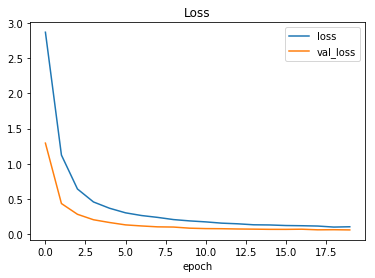

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

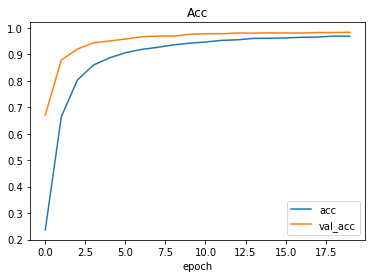

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('Acc')
plt.xlabel('epoch')


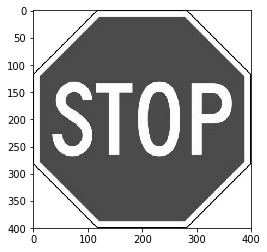

In [0]:
import requests
from PIL import Image
url = "https://2qrvzf20gyjyyrbe93pemsx1-wpengine.netdna-ssl.com/wp-content/uploads/2016/07/Stop-Sign-400.jpg"
response = requests.get(url,stream=True)
img = Image.open(response.raw).convert("L")
plt.imshow(img,cmap="gray")

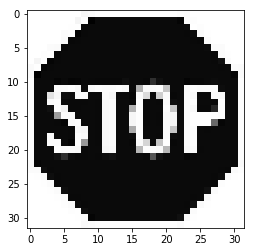

In [0]:
import cv2
img_array = np.asarray(img)
res = cv2.resize(img_array,(32,32))
plt.imshow(res,cmap="gray")

In [0]:
res = res/255
res = res.reshape(1,32,32,1)
lenet2.predict_classes(res)
# lenet.predict(res)

array([14])